## Create a sample of a CSV file

Since the CSV files are over a million rows, we take a sample of smaller size for faster computations.

This notebook creates a randomized sample of a given csv file. We use the matplotlib library to plot the distribution of the sampled data to show that the sample is not biased.
To choose the csv file to sample, change the `path` variable.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
path = "../cases/cases_2010.csv"

The `sample_size` variable decides the size fo the created sample (no. of rows). Change the variable to change the size.

In [3]:
nrows=sum(1 for line in open(path)) - 1
sample_size=min(int(1e5), nrows)

The below code randomizes the rows to be sampled. This is done using `skiprows` argument of `pandas.read_csv()` function.

In [4]:
skip=sorted(random.sample(range(1,nrows+1), nrows-sample_size))
cases_df_2010 = pd.read_csv(path, skiprows=skip)

Now we plot the distribution of the rows to ensure the samples from different states are proportional to the initial dataset.

<AxesSubplot: ylabel='state_code'>

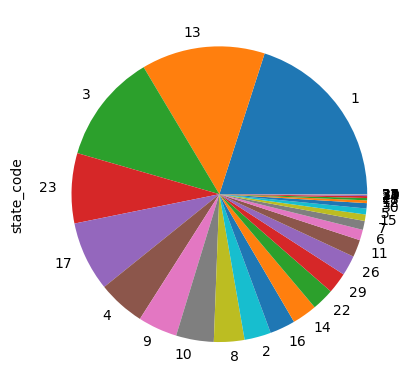

In [5]:
cases_df_2010.state_code.value_counts().plot(kind='pie')

<AxesSubplot: >

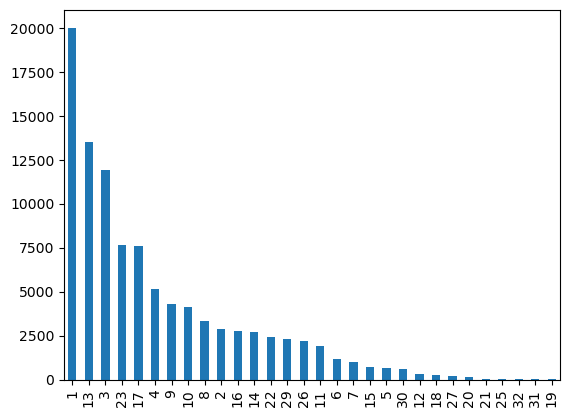

In [6]:
cases_df_2010.state_code.value_counts().plot(kind='bar')

Now we write to a new CSV file.

In [7]:
cases_df_2010.to_csv('../cases/sample_2010.csv')

In [8]:
def read_random(filepath, sample):
    nrows=sum(1 for line in open(filepath)) - 1
    sample_size=min(int(sample), nrows)
    skip=sorted(random.sample(range(1,nrows+1), nrows-sample_size))
    return pd.read_csv(filepath, skiprows=skip)

mixed_cases = read_random("../cases/cases_2010.csv", 1.5e5)
for i in range(1,9):
    mixed_cases = pd.concat([mixed_cases, read_random("../cases/cases_201" + str(i) + ".csv", 1.5e5)])

mixed_cases.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-201908000172010,2010,1,1,1,MHNB030000482010,chief judicial magistrate,0 male,-9998 unclear,-9999,0,1429.0,4946.0,25,2010-01-20,2012-10-19,2010-04-20,2012-09-13,2012-10-19
1,01-01-01-201908000292010,2010,1,1,1,MHNB030001902010,chief judicial magistrate,0 male,1 female,0,1,1429.0,3006.0,30,2010-02-25,2010-12-01,2010-03-18,2010-11-29,2010-12-01
2,01-01-01-201908000602010,2010,1,1,1,MHNB030004262010,chief judicial magistrate,-9998 unclear,0 male,-9998,1,1429.0,509.0,25,2010-05-06,2010-05-26,2010-05-10,2010-05-25,2010-05-26
3,01-01-01-201908000742010,2010,1,1,1,MHNB030005682010,chief judicial magistrate,-9998 unclear,0 male,-9999,0,1429.0,2237.0,30,2010-05-29,2013-04-29,2010-06-17,2013-04-12,2013-04-29
4,01-01-01-201908001032010,2010,1,1,1,MHNB030006862010,chief judicial magistrate,0 male,1 female,-9999,-9998,1429.0,4882.0,25,2010-07-08,2010-11-20,2010-08-10,2010-10-30,2010-11-20


In [9]:
mixed_cases.year.value_counts()

2010    150000
2011    150000
2012    150000
2013    150000
2014    150000
2015    150000
2016    150000
2017    150000
2018    150000
Name: year, dtype: int64

In [11]:
mixed_cases.to_csv("../cases/mixed_sample.csv")